# Logistic map
## Expert Level

ISU: 502552  
N = 502552 mod 5 = 2  
Вариант функции: $g(x_n) = r x_n (1-x_n)^2$, $r \in [0; \frac{27}{4}]$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.style.use('seaborn-v0_8-whitegrid')
def logistic_map(x, r):
    return r * x * (1 - x)

def variant_map(x, r):
    return r * x * (1 - x)**2

def generate_sequence(x0, r, num_steps, map_func=logistic_map):
    x_seq = [x0]
    x = x0
    for _ in range(num_steps - 1):
        x = map_func(x, r)
        x_seq.append(x)
    return np.array(x_seq)

def lamerey_ladder(x0, r, num_iterations=50, map_func=logistic_map, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 10))

    x = np.linspace(0, 1, 500)
    y = map_func(x, r)
    ax.plot(x, y, 'b-', linewidth=2, label=f'$f(x)$, r={r}')
    ax.plot(x, x, 'k--', linewidth=1.5, label='$y=x$')

    x_current = x0
    x_points = [x_current]
    y_points = [0]

    for i in range(num_iterations):
        y_next = map_func(x_current, r)
        x_points.extend([x_current, x_current])
        y_points.extend([y_points[-1], y_next])
        x_points.extend([x_current, y_next])
        y_points.extend([y_next, y_next])
        x_current = y_next
        if x_current < 0 or x_current > 1:
            break

    ax.plot(x_points, y_points, 'r-', linewidth=0.8, alpha=0.7, label='Лестница Ламерея')
    ax.plot(x0, 0, 'go', markersize=10, label=f'$x_0={x0}$')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x_n$', fontsize=14)
    ax.set_ylabel('$x_{n+1}$', fontsize=14)
    ax.set_title(f'Лестница Ламерея для r={r}', fontsize=16)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)

    return ax

# Expert:

## Следует ли асимптотическая устойчивость $x^*$ из условия $\exists \delta_0 > 0 : |x_0 - x^*| < \delta_0 \implies x_n \xrightarrow{n\to\infty} x^*$? Обоснуйте свой ответ.

**Ответ: НЕТ**, асимптотическая устойчивость не следует автоматически из этого условия.

**Обоснование:**

Напомним определения:

1. **Устойчивость (по Ляпунову):** $\forall \varepsilon > 0 \; \exists \delta > 0 : |x_0 - x^*| < \delta \implies |x_n - x^*| < \varepsilon \; \forall n$

2. **Асимптотическая устойчивость:** точка $x^*$ устойчива И $\exists \delta_0 > 0 : |x_0 - x^*| < \delta_0 \implies x_n \xrightarrow{n\to\infty} x^*$

Данное в условии свойство (сходимость) - это только **вторая часть** определения асимптотической устойчивости.

Для асимптотической устойчивости требуется также выполнение **первой части** - устойчивости по Ляпунову.

**Пример:** Можно построить систему, где траектории сходятся к $x^*$, но при этом могут временно отклоняться на произвольно большие расстояния. Такая точка будет асимптотически притягивающей, но не устойчивой по Ляпунову.

**Вывод:** Для асимптотической устойчивости необходимо проверить **оба** условия:
- Устойчивость (траектории остаются близко)
- Сходимость (траектории стремятся к точке)

# Expert:

## Докажите или опровергните утверждение. При $r \in (0; 1)$ неподвижная точка $x^* = 0$ является устойчивой. Является ли она асимптотически устойчивой?

**Утверждение ВЕРНО.** Докажем.

### Доказательство устойчивости

Для логистического отображения $f(x) = rx(1-x)$ при $r \in (0, 1)$:

**1. Найдем производную в точке $x^* = 0$:**

$$f'(x) = r(1-x) - rx = r(1-2x)$$
$$f'(0) = r$$

**2. Условие устойчивости:** Для неподвижной точки дискретного отображения:
- Устойчива, если $|f'(x^*)| < 1$
- Неустойчива, если $|f'(x^*)| > 1$

При $r \in (0, 1)$ имеем $|f'(0)| = r < 1$, следовательно, $x^* = 0$ **устойчива**.

**3. Асимптотическая устойчивость:**

Из уровня Easy мы доказали, что при $r \in (0, 1]$ последовательность монотонно убывает и сходится к 0.

Значит, $\exists \delta_0 = 1 : |x_0 - 0| < 1 \implies x_n \to 0$ при $n \to \infty$.

Поскольку выполнены **оба** условия (устойчивость и сходимость), точка $x^* = 0$ является **асимптотически устойчивой** при $r \in (0, 1)$.

**Вывод:** $x^* = 0$ при $r \in (0, 1)$ является **асимптотически устойчивой**.

# Expert:

## Докажите, что точка $x^* = 0$ при $r \in (2; 3)$ является неустойчивой.

**Доказательство:**

Используем критерий устойчивости неподвижной точки для дискретного отображения.

**1. Производная в точке $x^* = 0$:**

Для $f(x) = rx(1-x)$:
$$f'(x) = r(1-2x)$$
$$f'(0) = r$$

**2. Критерий неустойчивости:**

Неподвижная точка $x^*$ **неустойчива**, если $|f'(x^*)| > 1$.

При $r \in (2, 3)$ имеем:
$$|f'(0)| = r > 1$$

Следовательно, точка $x^* = 0$ **неустойчива**.

**3. Геометрическая интерпретация:**

При $r > 1$ угол наклона функции $f(x)$ в точке $x=0$ больше 45°, что означает, что траектории **отталкиваются** от нуля.

Малое возмущение $\delta$ от нуля будет экспоненциально расти:
$$|x_1 - 0| \approx r|x_0 - 0| = r\delta$$
$$|x_2 - 0| \approx r^2\delta$$
и так далее.

При $r \in (2, 3)$ траектории уходят от нуля и сходятся ко второй неподвижной точке $x^* = 1 - \frac{1}{r}$, которая является устойчивой.

**Вывод:** Точка $x^* = 0$ при $r \in (2, 3)$ является **неустойчивой**. $\blacksquare$

# Expert:

## Напишите функцию, которая для заданных $x_0, y_0 = x_0 + \varepsilon, r$ строит две траектории лестницы Ламерея на одном графике. Постройте этот график для $r = 4$. Как можно интерпретировать результаты?

Это демонстрирует **чувствительность к начальным условиям** (sensitivity to initial conditions) - ключевое свойство хаотических систем, также известное как **эффект бабочки**.

In [18]:
def lamerey_two_trajectories(x0, epsilon, r, num_iterations=50, map_func=logistic_map):
    """
    Строит лестницы Ламерея для двух траекторий с близкими начальными условиями.
    """
    fig, ax = plt.subplots(figsize=(12, 12))

    x = np.linspace(0, 1, 500)
    y = map_func(x, r)
    ax.plot(x, y, 'b-', linewidth=2, label=f'$f(x)$, r={r}', alpha=0.6)
    ax.plot(x, x, 'k--', linewidth=1.5, label='$y=x$', alpha=0.6)
    
    y0 = x0 + epsilon
    
    #первая траектория
    x_current = x0
    x_points1, y_points1 = [x_current], [0]
    
    for i in range(num_iterations):
        y_next = map_func(x_current, r)
        x_points1.extend([x_current, x_current, x_current, y_next])
        y_points1.extend([y_points1[-1], y_next, y_next, y_next])
        x_current = y_next
        if x_current < 0 or x_current > 1:
            break
    
    #вторая траектория
    x_current = y0
    x_points2, y_points2 = [x_current], [0]
    
    for i in range(num_iterations):
        y_next = map_func(x_current, r)
        x_points2.extend([x_current, x_current, x_current, y_next])
        y_points2.extend([y_points2[-1], y_next, y_next, y_next])
        x_current = y_next
        if x_current < 0 or x_current > 1:
            break
    
    #лестница
    ax.plot(x_points1, y_points1, 'r-', linewidth=1.2, alpha=0.7, 
            label=f'Траектория 1: $x_0={x0}$')
    ax.plot(x_points2, y_points2, 'g-', linewidth=1.2, alpha=0.7, 
            label=f'Траектория 2: $y_0={y0:.6f}$')
    
    ax.plot(x0, 0, 'ro', markersize=10)
    ax.plot(y0, 0, 'go', markersize=10)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x_n$', fontsize=14)
    ax.set_ylabel('$x_{n+1}$', fontsize=14)
    ax.set_title(f'Чувствительность к начальным условиям при r={r}, Эпсилон={epsilon}',
                 fontsize=15)
    ax.legend(fontsize=11, loc='upper right')
    ax.grid(True, alpha=0.3)
    
    return fig, ax

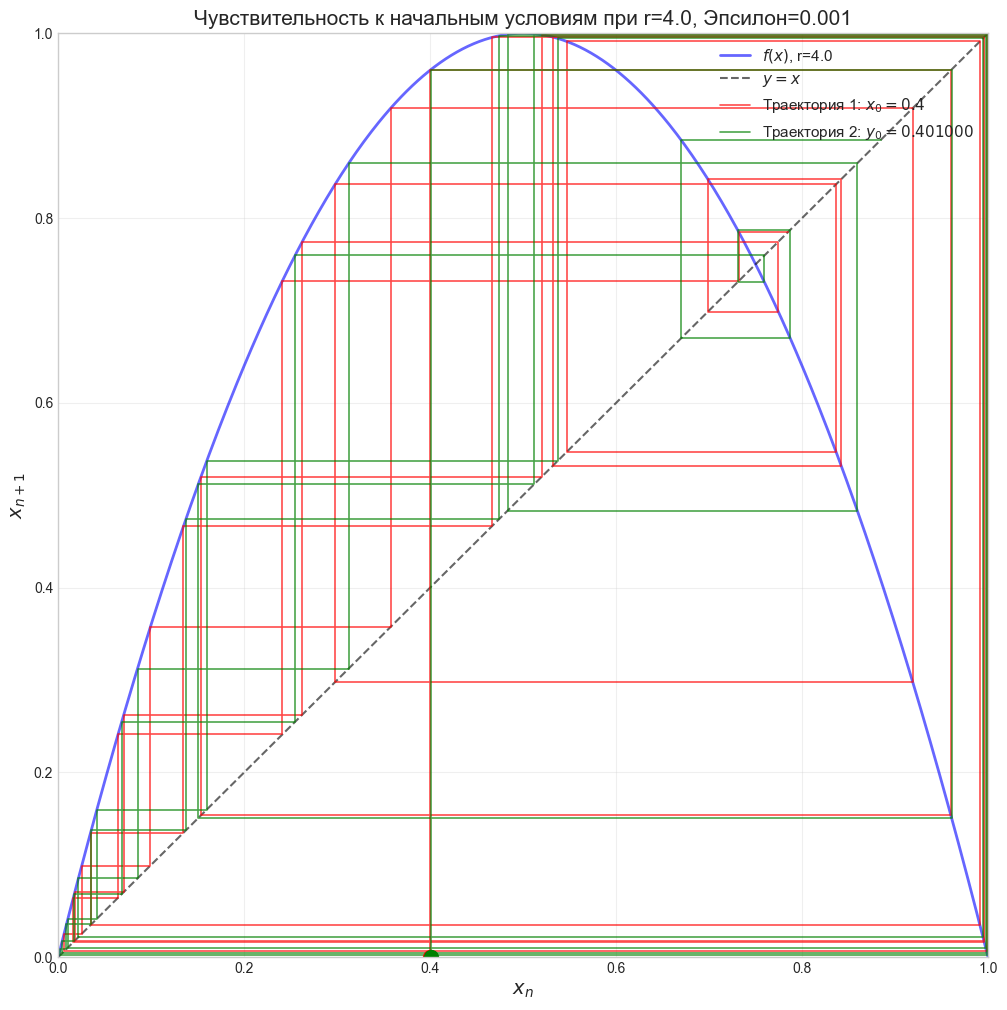

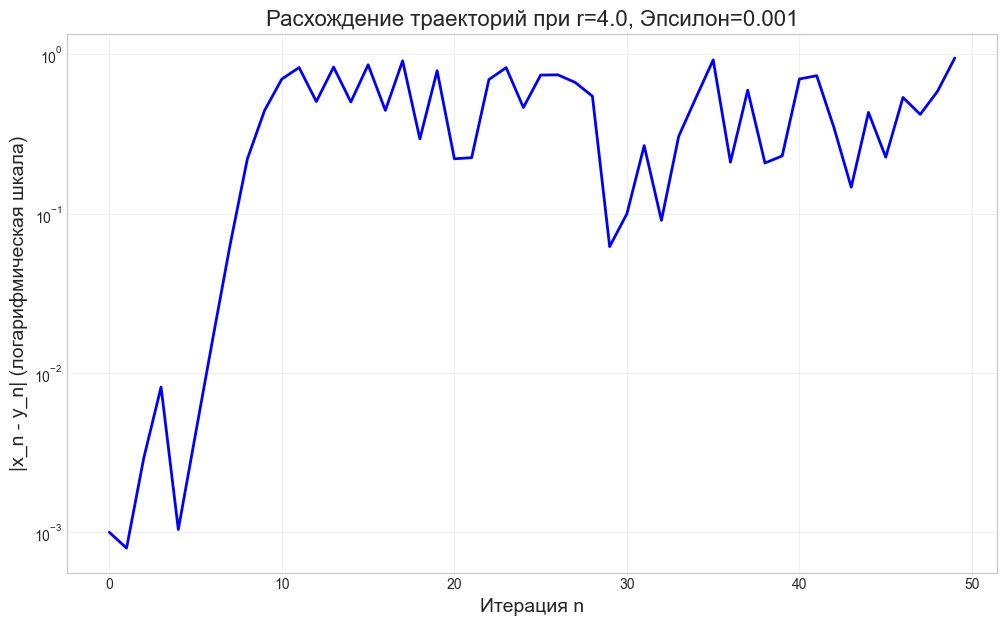

Начальное расхождение: 0.001000
Расхождение после 10 итераций: 0.699500
Расхождение после 20 итераций: 0.220933


In [19]:
#эффект бабочки при r=4
x0, epsilon, r = 0.4, 0.001, 4.0
fig, ax = lamerey_two_trajectories(x0, epsilon, r, num_iterations=30)
plt.show()

seq1 = generate_sequence(x0, r, 50)
seq2 = generate_sequence(x0 + epsilon, r, 50)
divergence = np.abs(seq1 - seq2)

plt.figure(figsize=(12, 7))
plt.semilogy(divergence, 'b-', linewidth=2)
plt.xlabel('Итерация n', fontsize=14)
plt.ylabel('|x_n - y_n| (логарифмическая шкала)', fontsize=14)
plt.title(f'Расхождение траекторий при r={r}, Эпсилон={epsilon}', fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Начальное расхождение: {divergence[0]:.6f}")
print(f"Расхождение после 10 итераций: {divergence[10]:.6f}")
print(f"Расхождение после 20 итераций: {divergence[20]:.6f}")

## Интерпретация результатов

**Наблюдения:**

1. **Начальная близость:** Две траектории начинаются очень близко друг к другу (разница $\varepsilon = 0.001$)

2. **Быстрое расхождение:** Уже через несколько итераций траектории начинают существенно расходиться

3. **Экспоненциальный рост:** График расхождения в логарифмическом масштабе показывает, что расхождение растет **экспоненциально** (прямая линия на полулогарифмическом графике)

4. **Хаотическое поведение:** Через ~10-15 итераций траектории становятся полностью независимыми и заполняют всю доступную область

**Выводы:**

Это демонстрирует **чувствительность к начальным условиям** - фундаментальное свойство хаотических систем:

$$\exists \delta > 0 \; \forall x_0 \; \forall \varepsilon > 0 \; \exists y_0 : |x_0 - y_0| < \varepsilon \land |x_n - y_n| > \delta$$

**Практическое значение:**

- **Невозможность долгосрочного прогнозирования:** Даже минимальная погрешность в начальных условиях или измерениях экспоненциально растет, делая долгосрочный прогноз невозможным

- **Эффект бабочки:** Метафора о том, что "взмах крыльев бабочки в Бразилии может вызвать торнадо в Техасе" иллюстрирует эту чувствительность

- **Детерминированность ≠ Предсказуемость:** Хотя система полностью детерминирована (нет случайности), она непредсказуема на длинных временах из-за чувствительности к начальным условиям

При $r = 4$ логистическое отображение находится в **полностью хаотическом режиме**, что и объясняет наблюдаемое поведение.

# Expert:

## Постройте бифуркационную диаграмму логистического отображения. Проанализируйте: как интерпретировать полученный график? Где на диаграмме находится $r_\infty$? Как ведет себя система до $r_\infty$? После?

Бифуркационная диаграмма - это график, показывающий долговременное поведение системы (аттрактор) в зависимости от управляющего параметра $r$.

In [20]:
def bifurcation_diagram(r_min, r_max, num_r=2000, num_iterations=1000, 
                        last_n=100, x0=0.5, map_func=logistic_map, 
                        ax=None, title="Бифуркационная диаграмма"):
    """
    Строит бифуркационную диаграмму.
    
    Параметры:
    - r_min, r_max: диапазон значений r
    - num_r: количество точек r
    - num_iterations: общее количество итераций на каждое r
    - last_n: количество последних итераций для отображения (после переходного процесса)
    - x0: начальное значение
    - map_func: функция отображения
    - ax: matplotlib axis
    - title: заголовок графика
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 9))
    
    r_values = np.linspace(r_min, r_max, num_r)
    
    print(f"Построение бифуркационной диаграммы для {num_r} значений r...")
    
    for i, r in enumerate(r_values):

        seq = generate_sequence(x0, r, num_iterations, map_func)

        last_values = seq[-last_n:]

        ax.plot([r] * len(last_values), last_values, 'k,', markersize=0.5, alpha=0.3)
    
    ax.set_xlabel('r', fontsize=14)
    ax.set_ylabel('$x$', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.grid(True, alpha=0.3)

    
    return ax

Построение бифуркационной диаграммы для 3000 значений r...


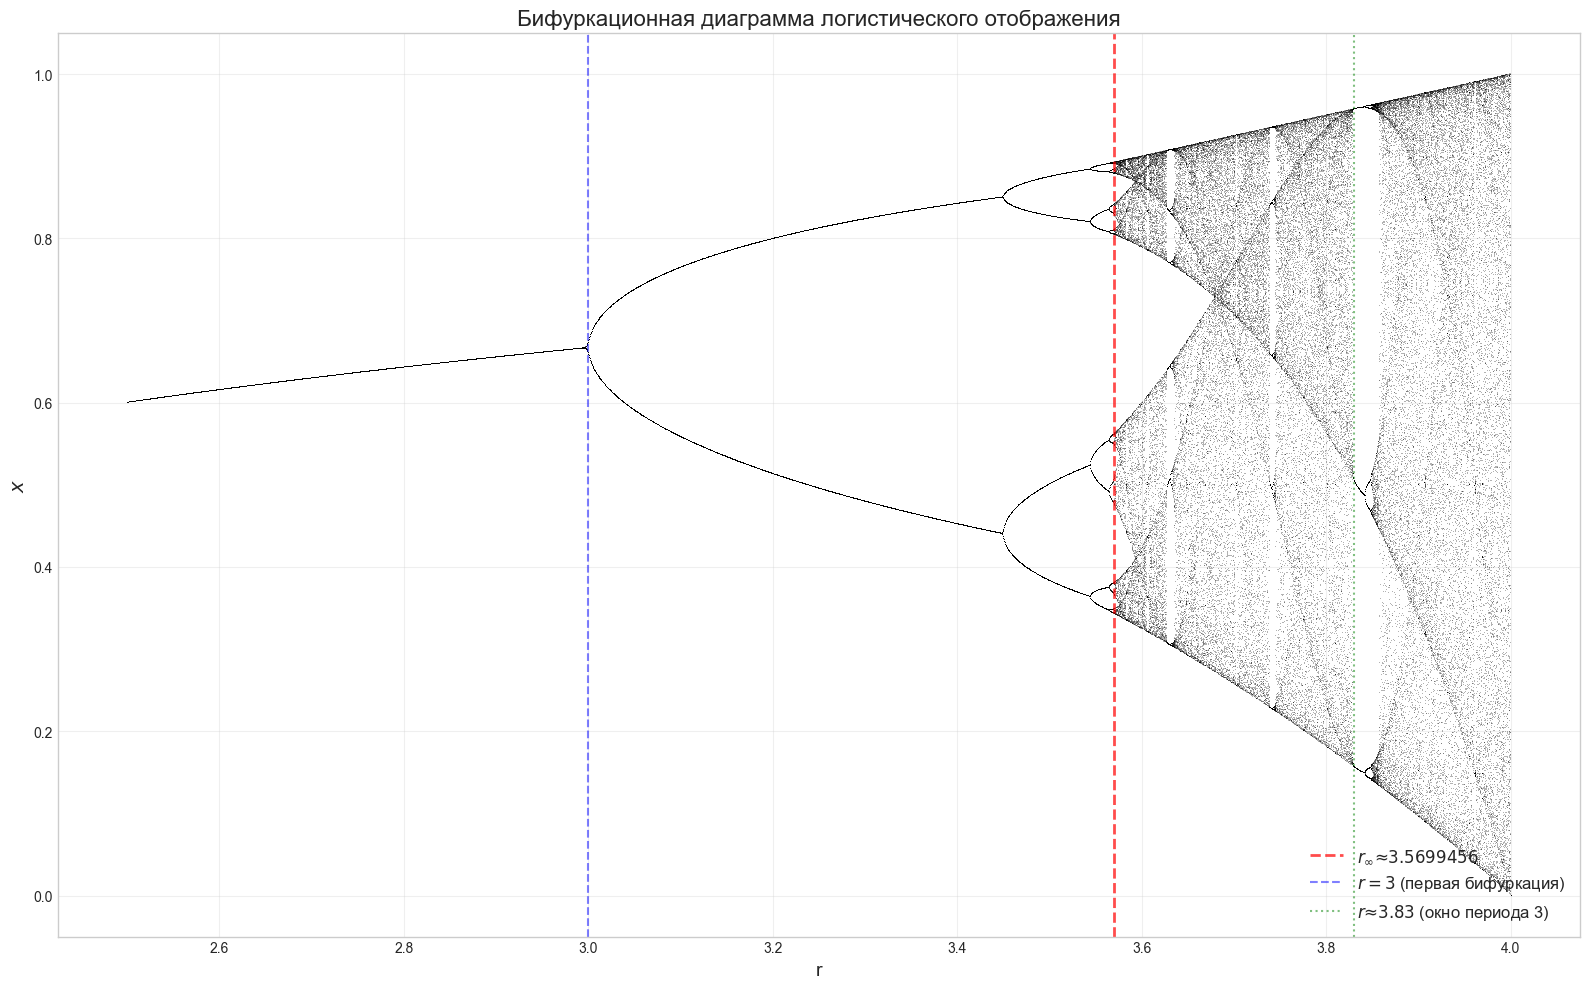

In [21]:
fig, ax = plt.subplots(figsize=(16, 10))
bifurcation_diagram(2.5, 4.0, num_r=3000, num_iterations=1000, last_n=100, 
                    ax=ax, title="Бифуркационная диаграмма логистического отображения")

r_infinity = 3.5699456
ax.axvline(x=r_infinity, color='r', linestyle='--', linewidth=2, alpha=0.7, 
           label=f'$r_inf ~= {r_infinity}$')

ax.axvline(x=3.0, color='b', linestyle='--', linewidth=1.5, alpha=0.5, 
           label='$r = 3$ (первая бифуркация)')

ax.axvline(x=3.83, color='g', linestyle=':', linewidth=1.5, alpha=0.5, 
           label='$r ~= 3.83$ (окно периода 3)')

ax.legend(fontsize=12, loc='lower right')
plt.tight_layout()
plt.show()

## Интерпретация бифуркационной диаграммы

### Как интерпретировать график?

Бифуркационная диаграмма показывает **установившееся поведение** (аттрактор) системы для каждого значения параметра $r$:

1. **Одна точка на диаграмме:** система сходится к неподвижной точке (период 1)
2. **Две точки:** система имеет цикл периода 2 (колебания между двумя значениями)
3. **Четыре точки:** цикл периода 4
4. **Область, заполненная точками:** хаотическое поведение

### Поведение системы при различных $r$:

#### 1. $r \in (0, 1]$: Сходимость к нулю
- Система монотонно убывает к $x^* = 0$
- Единственная неподвижная точка устойчива

#### 2. $r \in (1, 3]$: Сходимость к ненулевой неподвижной точке
- Точка $x^* = 0$ становится неустойчивой
- Появляется вторая неподвижная точка $x^* = 1 - \frac{1}{r}$, которая устойчива
- На диаграмме видна одна ветвь

#### 3. **До $r_\infty$** ($r \in (3, r_\infty)$): Каскад удвоения периода
- **$r = 3$:** Первая бифуркация - рождается цикл периода 2
- **$r \approx 3.449$:** Вторая бифуркация - цикл периода 4
- **$r \approx 3.544$:** Третья бифуркация - цикл периода 8
- **$r \approx 3.564$:** Цикл периода 16
- И так далее: $1 \to 2 \to 4 \to 8 \to 16 \to 32 \to ...$

Интервалы между бифуркациями уменьшаются геометрически с коэффициентом **константы Фейгенбаума** $\delta \approx 4.669$

#### 4. **В точке $r_\infty \approx 3.5699456$:** Переход к хаосу
- Период цикла формально становится бесконечным ($2^\infty$)
- Это точка **accumulation** (накопления) бифуркаций
- Начинается хаотическая динамика

#### 5. **После $r_\infty$** ($r > r_\infty$): Хаос с окнами периодичности
- Преобладает хаотическое поведение
- **Окна периодичности:** области с регулярным поведением
  - Самое заметное: окно периода 3 около $r \approx 3.83$
  - Также есть окна периодов 5, 6, 7 и других
- Внутри окон происходят свои каскады удвоения периода

### Фрактальная структура

Бифуркационная диаграмма обладает **самоподобием** (фрактальной структурой):
- При увеличении любого фрагмента мы видим похожую структуру
- Это проявление **универсальности Фейгенбаума**

### Значение $r_\infty$

$r_\infty \approx 3.5699456$ - это **критическая точка**, отделяющая регулярную динамику (периодические циклы) от хаотической.

# Expert:

## С помощью увеличения фрагмента около $r \approx 3.83$ визуализируйте фрактальную структуру (самоподобие) диаграммы.

Бифуркационная диаграмма обладает **самоподобием** - при увеличении любого фрагмента мы видим структуру, похожую на всю диаграмму. Это проявление фрактальной природы хаоса.


Создание диаграммы 1/4: Полная диаграмма
Построение бифуркационной диаграммы для 1500 значений r...

Создание диаграммы 2/4: Окрестность r ~= 3.83
Построение бифуркационной диаграммы для 1500 значений r...

Создание диаграммы 3/4: Увеличение: окно периода 3
Построение бифуркационной диаграммы для 1500 значений r...

Создание диаграммы 4/4: Дальнейшее увеличение
Построение бифуркационной диаграммы для 1500 значений r...


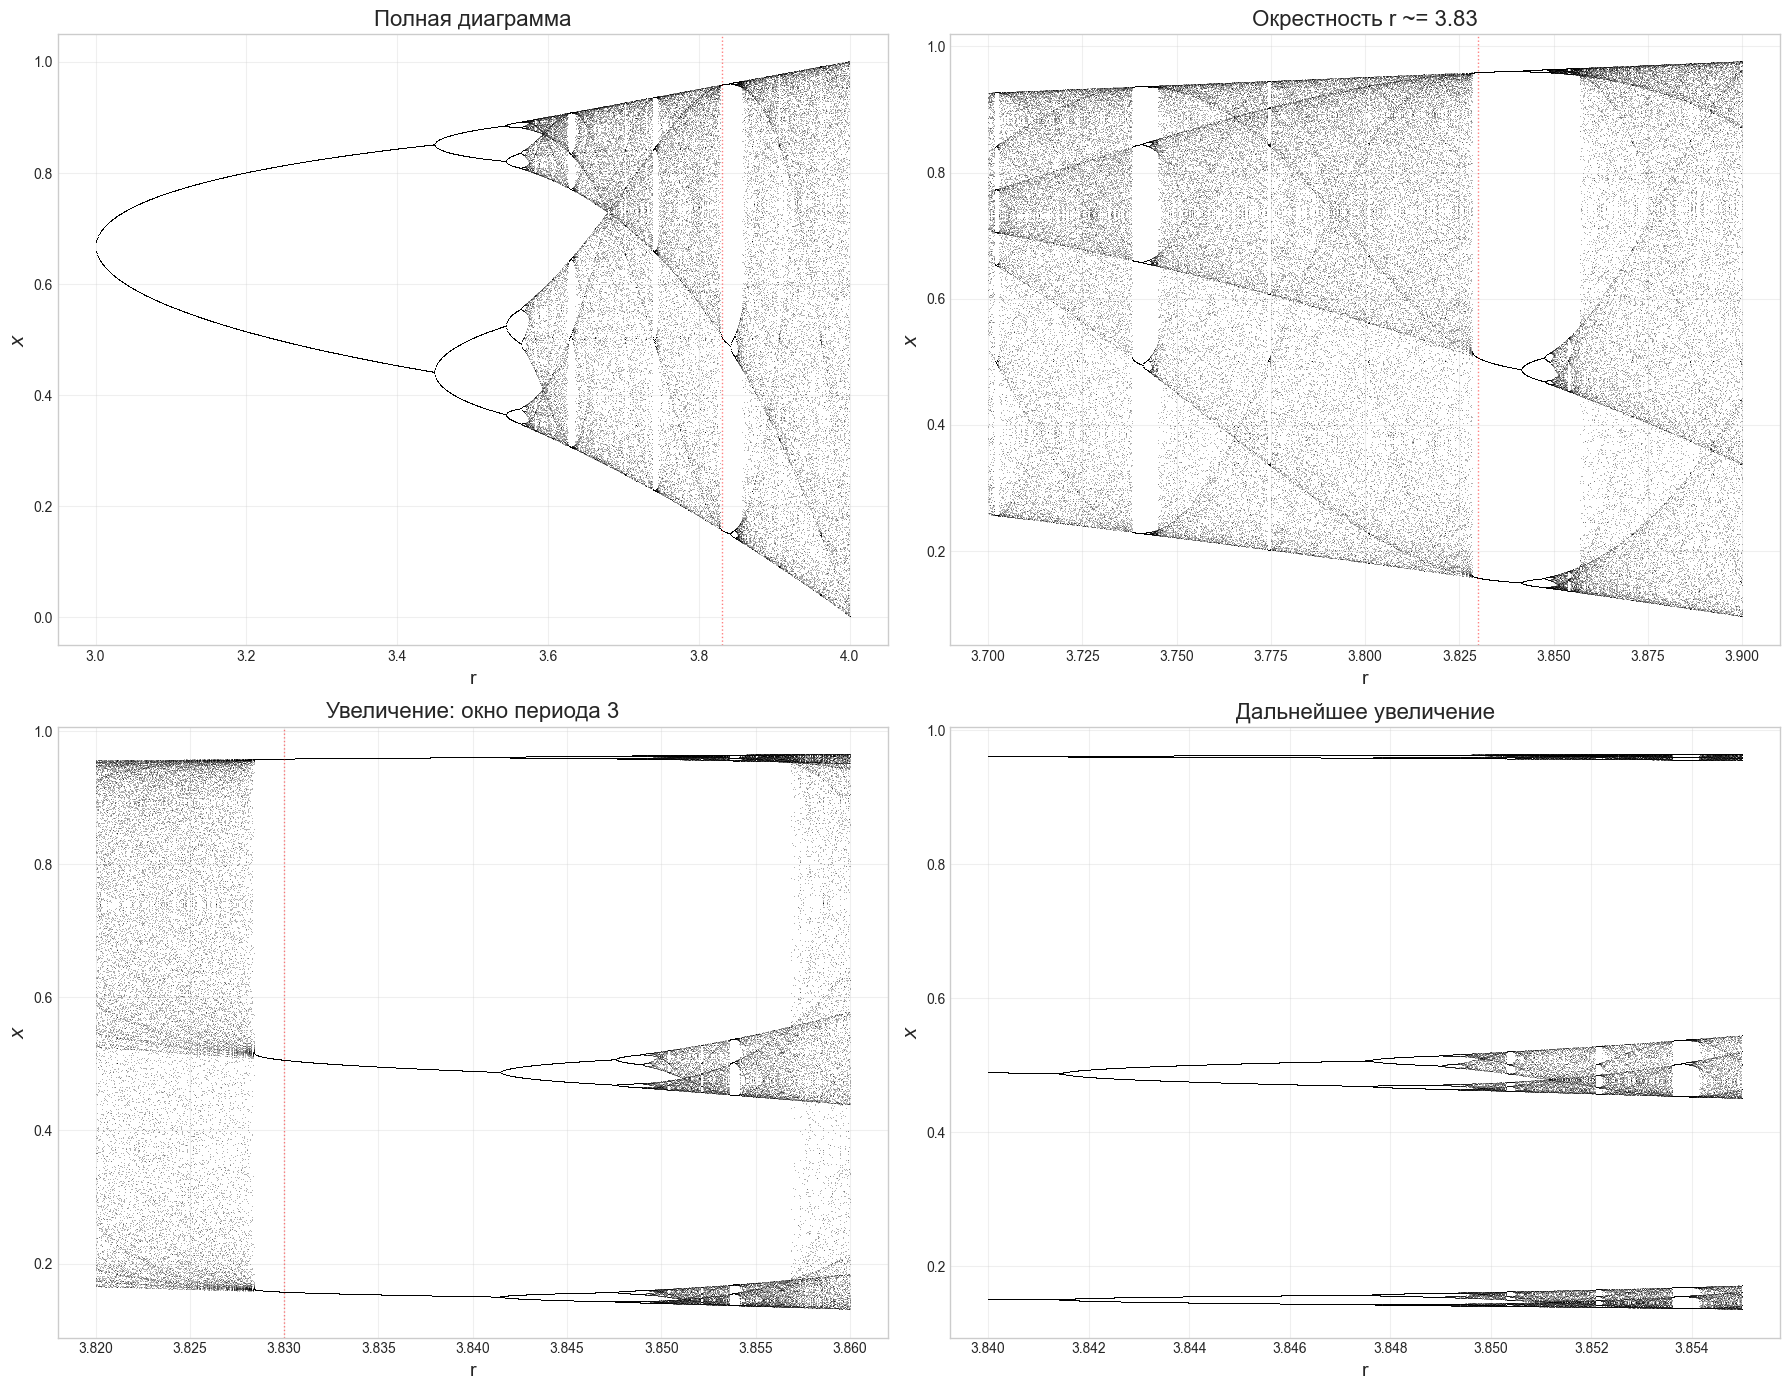

При каждом увеличении видно похожую структуру
Это демонстрирует фрактальность диаграммы.


In [22]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.flatten()

zoom_regions = [
    (3.0, 4.0, "Полная диаграмма"),
    (3.7, 3.9, "Окрестность r ~= 3.83"),
    (3.82, 3.86, "Увеличение: окно периода 3"),
    (3.840, 3.855, "Дальнейшее увеличение")
]

for i, (r_min, r_max, title) in enumerate(zoom_regions):
    print(f"\nСоздание диаграммы {i+1}/4: {title}")
    bifurcation_diagram(r_min, r_max, num_r=1500, num_iterations=800, last_n=80,
                       ax=axes[i], title=title, map_func=logistic_map)

    if r_min <= 3.83 <= r_max:
        axes[i].axvline(x=3.83, color='r', linestyle=':', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

print("При каждом увеличении видно похожую структуру")
print("Это демонстрирует фрактальность диаграммы.")

# Expert:

## Приближенно найдите значения $r$, при которых возникают циклы с периодом 3, 5, 6. Отобразите область(-и) бифуркационной диаграммы с соответствующими окнами периодичности.

**Окна периодичности** - это области параметра $r$ в хаотическом режиме, где система возвращается к регулярному поведению с конечным периодом.

In [23]:
def find_period(x0, r, max_iterations=3000, settle_time=1000, tolerance=1e-6, map_func=logistic_map):
    """Находит период цикла для заданного r. Возвращает -1 если хаос."""
    seq = generate_sequence(x0, r, max_iterations, map_func)
    seq_stable = seq[settle_time:]
    seq_stable = np.round(seq_stable / tolerance) * tolerance
    
    unique_vals = np.unique(seq_stable)
    if len(unique_vals) > 100:
        return -1
    
    for period in range(1, min(200, len(seq_stable) // 2)):
        is_periodic = True
        for i in range(len(seq_stable) - period):
            if abs(seq_stable[i] - seq_stable[i + period]) > tolerance:
                is_periodic = False
                break
        if is_periodic:
            return period
    return -1

def find_period_window(target_period, r_min, r_max, num_r=500, x0=0.5, map_func=logistic_map):
    """Находит окно с заданным периодом."""
    r_values_with_period = []
    r_test = np.linspace(r_min, r_max, num_r)
    
    for r in r_test:
        period = find_period(x0, r, max_iterations=3000, settle_time=1000, map_func=map_func)
        if period == target_period:
            r_values_with_period.append(r)
    
    return np.array(r_values_with_period)

print("Поиск окон периодичности...\n")

print("Поиск окна периода 3...")
r_period3 = find_period_window(3, 3.82, 3.86, num_r=500)
if len(r_period3) > 0:
    r3_min, r3_max = r_period3.min(), r_period3.max()
    r3_center = (r3_min + r3_max) / 2
    print(f"Окно периода 3: r \in [{r3_min:.6f}, {r3_max:.6f}]")
    print(f"Центр окна: r ~= {r3_center:.6f}")
else:
    print("Окно не найдено в заданном диапазоне")
    r3_center = 3.83

print("\nИщем окно периода 5...")
r_period5 = find_period_window(5, 3.73, 3.76, num_r=500)
if len(r_period5) > 0:
    r5_min, r5_max = r_period5.min(), r_period5.max()
    r5_center = (r5_min + r5_max) / 2
    print(f"Окно периода 5: r \in [{r5_min:.6f}, {r5_max:.6f}]")
    print(f"Центр окна: r ~= {r5_center:.6f}")
else:
    print("Окно не найдено в заданном диапазоне")
    r5_center = 3.74

print("\nИщем окно периода 6...")
r_period6 = find_period_window(6, 3.625, 3.7, num_r=500)
if len(r_period6) > 0:
    r6_min, r6_max = r_period6.min(), r_period6.max()
    r6_center = (r6_min + r6_max) / 2
    print(f"Окно периода 6: r \in [{r6_min:.6f}, {r6_max:.6f}]")
    print(f"Центр окна: r ~= {r6_center:.6f}")
else:
    print("Окно не найдено в заданном диапазоне")
    r6_center = 3.63

print("Период 6 = 2*3")

Поиск окон периодичности...

Поиск окна периода 3...
Окно периода 3: r ∈ [3.828497, 3.841082]
Центр окна: r ≈ 3.834790

Ищем окно периода 5...
Окно периода 5: r ∈ [3.738176, 3.740942]
Центр окна: r ≈ 3.739559

Ищем окно периода 6...
Окно периода 6: r ∈ [3.626653, 3.630110]
Центр окна: r ≈ 3.628382
Период 6 = 2*3



Создание диаграммы для окна периода 3...
Построение бифуркационной диаграммы для 2000 значений r...
Создание диаграммы для окна периода 5...
Построение бифуркационной диаграммы для 2000 значений r...
Создание диаграммы для окна периода 6...
Построение бифуркационной диаграммы для 2000 значений r...


C:\Users\denis_nonet38\AppData\Local\Temp\ipykernel_27480\1124822140.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\denis_nonet38\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


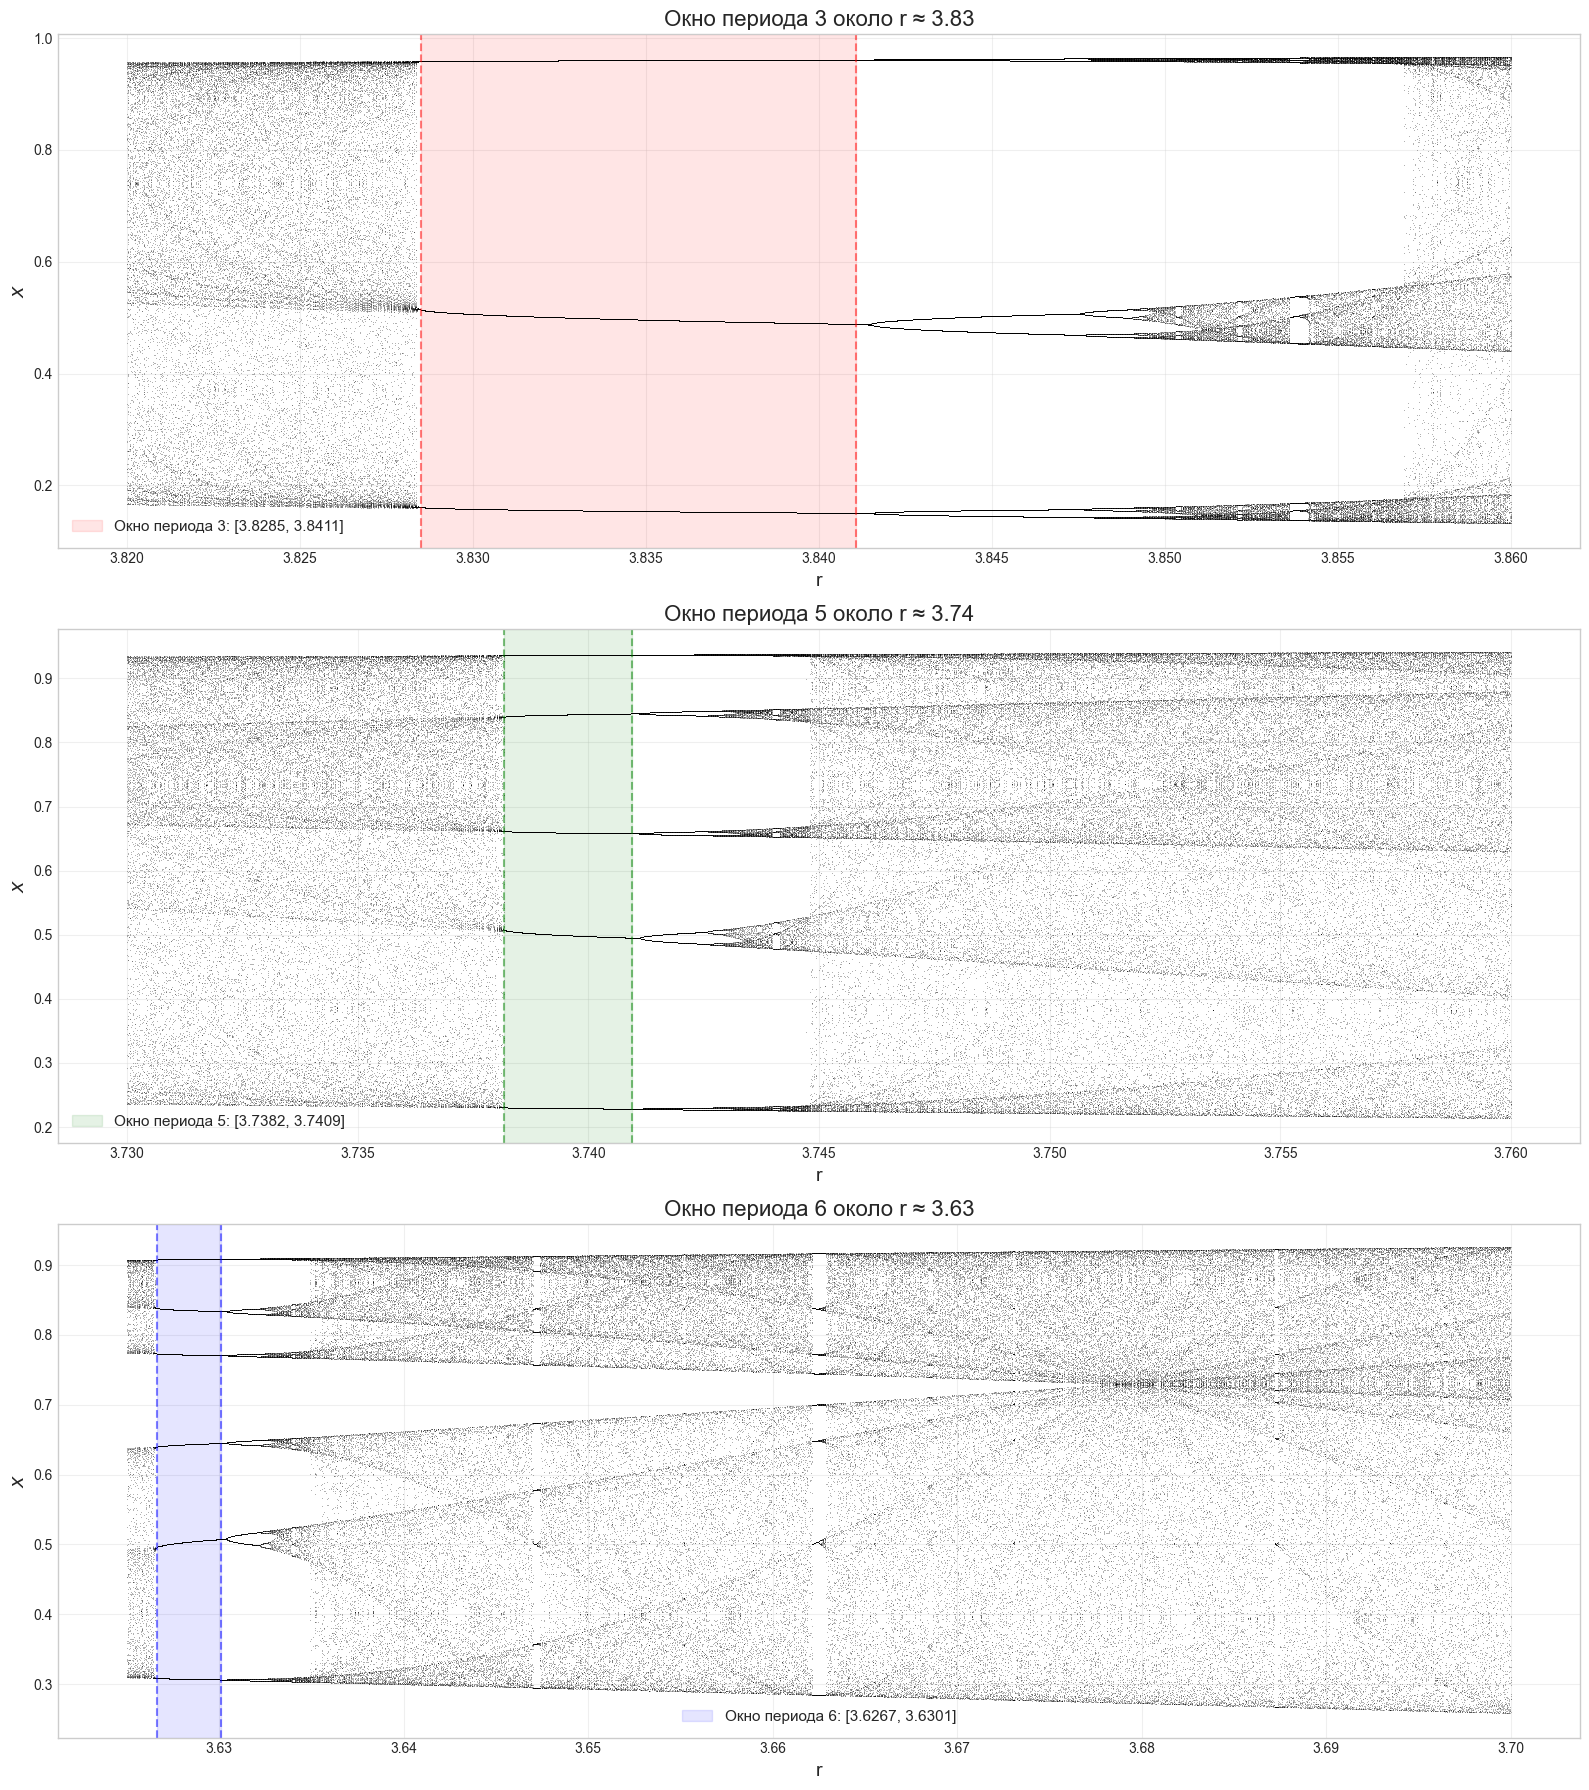


готово!


In [24]:
fig, axes = plt.subplots(3, 1, figsize=(16, 18))

print("\nСоздание диаграммы для окна периода 3...")
bifurcation_diagram(3.82, 3.86, num_r=2000, num_iterations=800, last_n=80,
                   ax=axes[0], title="Окно периода 3 около r ~= 3.83")
if len(r_period3) > 0:
    axes[0].axvline(x=r3_min, color='r', linestyle='--', alpha=0.5, linewidth=1.5)
    axes[0].axvline(x=r3_max, color='r', linestyle='--', alpha=0.5, linewidth=1.5)
    axes[0].axvspan(r3_min, r3_max, alpha=0.1, color='red', 
                   label=f'Окно периода 3: [{r3_min:.4f}, {r3_max:.4f}]')
axes[0].legend(fontsize=11)

print("Создание диаграммы для окна периода 5...")
bifurcation_diagram(3.73, 3.76, num_r=2000, num_iterations=800, last_n=80,
                   ax=axes[1], title="Окно периода 5 около r ~= 3.74")
if len(r_period5) > 0:
    axes[1].axvline(x=r5_min, color='g', linestyle='--', alpha=0.5, linewidth=1.5)
    axes[1].axvline(x=r5_max, color='g', linestyle='--', alpha=0.5, linewidth=1.5)
    axes[1].axvspan(r5_min, r5_max, alpha=0.1, color='green',
                   label=f'Окно периода 5: [{r5_min:.4f}, {r5_max:.4f}]')
axes[1].legend(fontsize=11)

print("Создание диаграммы для окна периода 6...")
bifurcation_diagram(3.625, 3.7, num_r=2000, num_iterations=800, last_n=80,
                   ax=axes[2], title="Окно периода 6 около r ~= 3.63")
if len(r_period6) > 0:
    axes[2].axvline(x=r6_min, color='b', linestyle='--', alpha=0.5, linewidth=1.5)
    axes[2].axvline(x=r6_max, color='b', linestyle='--', alpha=0.5, linewidth=1.5)
    axes[2].axvspan(r6_min, r6_max, alpha=0.1, color='blue',
                   label=f'Окно периода 6: [{r6_min:.4f}, {r6_max:.4f}]')
axes[2].legend(fontsize=11)

plt.tight_layout()
plt.show()

print("\nготово!")

# Expert:

## Для заданного вариантом отображения $g(x_n) = r x_n (1-x_n)^2$:

### 1. Численно или аналитически найдите верхнюю и нижнюю границы параметра $r$, при котором точка $x^* = 0$ является устойчивой, неустойчивой

**Аналитическое решение:**

Для отображения $g(x) = rx(1-x)^2$ найдем производную:

$$g'(x) = r(1-x)^2 + rx \cdot 2(1-x) \cdot (-1)$$
$$g'(x) = r(1-x)^2 - 2rx(1-x)$$
$$g'(x) = r(1-x)[(1-x) - 2x]$$
$$g'(x) = r(1-x)(1-3x)$$

В точке $x^* = 0$:
$$g'(0) = r \cdot 1 \cdot 1 = r$$

**Условие устойчивости:** $|g'(0)| < 1$

Следовательно:
- $|r| < 1 \implies -1 < r < 1$

Для $r > 0$ (физически осмысленный случай):

**Ответ:**
- **$x^* = 0$ устойчива** при $r \in (0, 1)$
- **$x^* = 0$ неустойчива** при $r > 1$

**Границы:**
- Нижняя граница устойчивости: $r = 0$
- Верхняя граница устойчивости (точка бифуркации): $r = 1$

In [25]:
print("Численная проверка устойчивости x*=0 для функции g(x) = rx(1-x)^2\n")

test_r_values = [0.5, 0.9, 0.99, 1.0, 1.01, 1.5, 2.0]
x0 = 0.1 

for r in test_r_values:
    seq = generate_sequence(x0, r, 100, map_func=variant_map)
    final_value = seq[-1]
    
    if abs(final_value) < 0.01:
        status = "Устойчива - сходится к 0"
    else:
        status = "Неустойчива - расходится"
    
    print(f"r = {r:4.2f}: x_100 = {final_value:.6f}  =>  x*=0 {status}")

print("\nВывод: Граница устойчивости находится при r = 1")
print("r < 1: x*=0 устойчива")
print("r > 1: x*=0 неустойчива")

Численная проверка устойчивости x*=0 для функции g(x) = rx(1-x)^2

r = 0.50: x_100 = 0.000000  =>  x*=0 Устойчива - сходится к 0
r = 0.90: x_100 = 0.000001  =>  x*=0 Устойчива - сходится к 0
r = 0.99: x_100 = 0.002652  =>  x*=0 Устойчива - сходится к 0
r = 1.00: x_100 = 0.004701  =>  x*=0 Устойчива - сходится к 0
r = 1.01: x_100 = 0.007580  =>  x*=0 Устойчива - сходится к 0
r = 1.50: x_100 = 0.183503  =>  x*=0 Неустойчива - расходится
r = 2.00: x_100 = 0.292893  =>  x*=0 Неустойчива - расходится

Вывод: Граница устойчивости находится при r = 1
r < 1: x*=0 устойчива
r > 1: x*=0 неустойчива


### 2. Постройте бифуркационную диаграмму. Отметьте сходства или различия с диаграммой логистического отображения

Построение бифуркационной диаграммы для 3500 значений r...


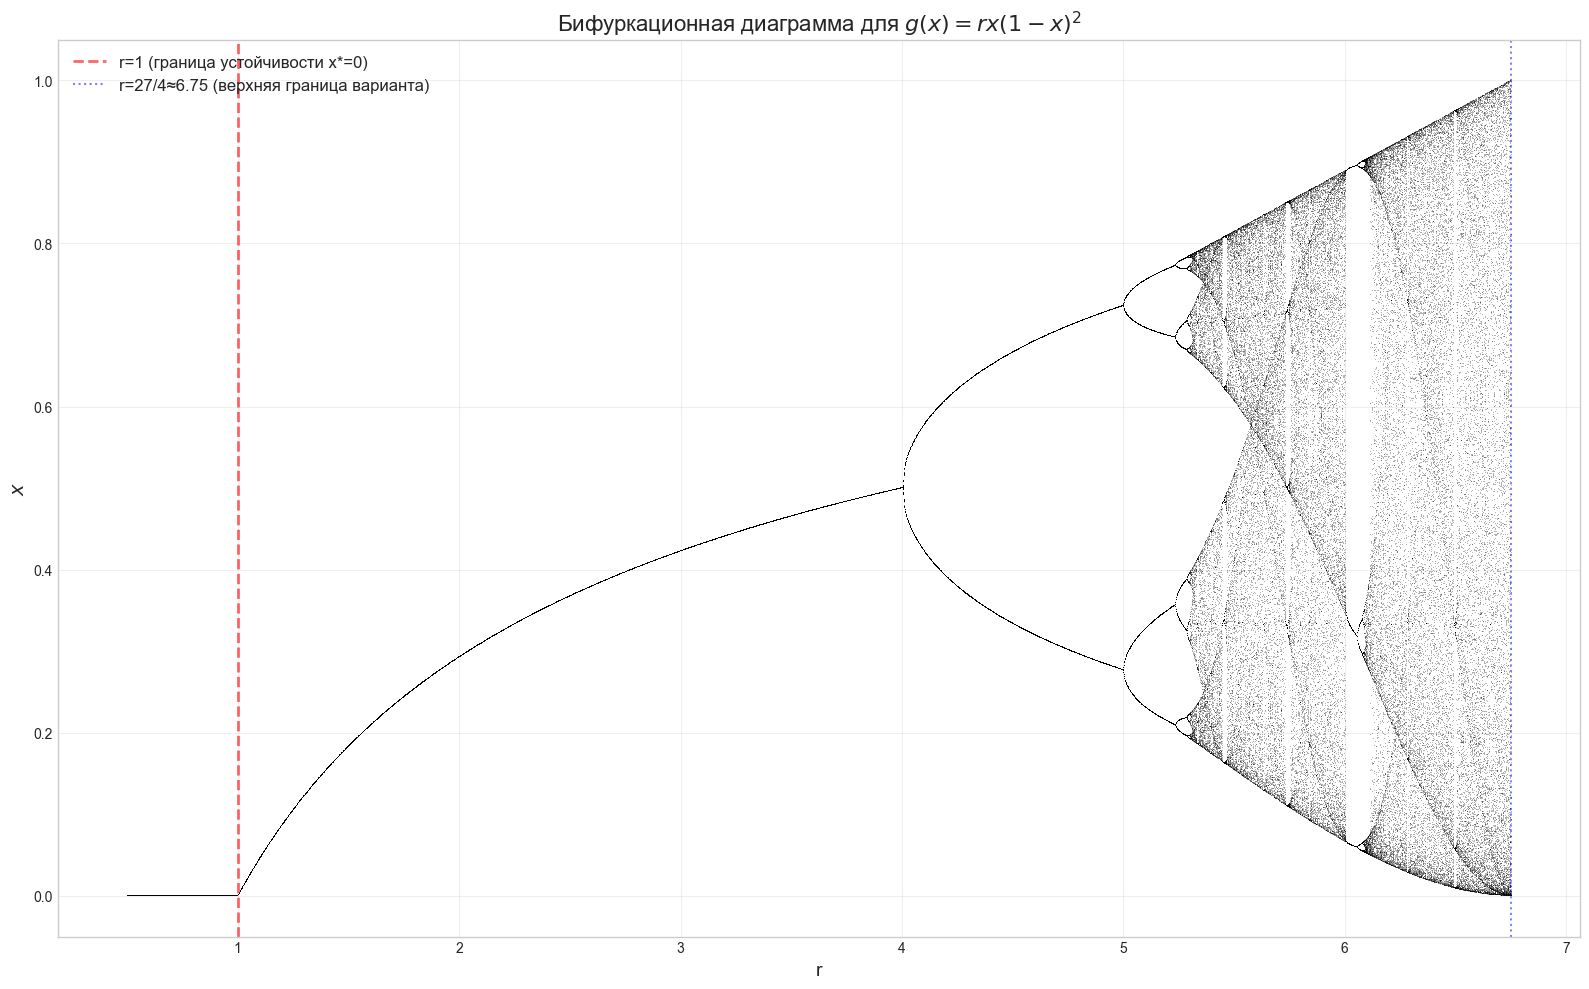

In [26]:
fig, ax = plt.subplots(figsize=(16, 10))

bifurcation_diagram(0.5, 6.75, num_r=3500, num_iterations=1000, last_n=100, 
                    map_func=variant_map,
                    ax=ax, 
                    title="Бифуркационная диаграмма для $g(x) = rx(1-x)^2$")

ax.axvline(x=1, color='r', linestyle='--', linewidth=2, alpha=0.6,
           label='r=1 (граница устойчивости x*=0)')

ax.axvline(x=6.75, color='b', linestyle=':', linewidth=1.5, alpha=0.5, 
           label='r=27/4~=6.75 (верхняя граница варианта)')

ax.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()

## Сравнение бифуркационных диаграмм

### Сходства:

1. **Качественная структура:** Обе диаграммы демонстрируют переход от регулярного поведения к хаосу

2. **Каскад удвоения периода:** В обеих системах наблюдается последовательность $1 \to 2 \to 4 \to 8 \to 16 \to ...$

3. **Хаотические области:** После каскада удвоений обе системы переходят в хаос

4. **Окна периодичности:** В хаотической области обеих систем присутствуют окна с регулярным поведением

5. **Самоподобие:** Обе диаграммы обладают фрактальной структурой

### Различия:

1. **Диапазон параметра:**
   - Логистическое: $r \in [0, 4]$
   - Вариант: $r \in [0, 6.75]$ - существенно шире

2. **Граница устойчивости x*=0:**
   - Логистическое: $r = 1$
   - Вариант: $r = 1$ (совпадает!)

3. **Начало первой бифуркации:**
   - Логистическое: $r = 3$
   - Вариант: происходит при другом значении $r$ (видно на диаграмме)

4. **Скорость перехода к хаосу:**
   - Форма $(1-x)^2$ в варианте создает более "мягкий" переход
   - Бифуркации растянуты на больший диапазон $r$

5. **Плотность хаотических областей:**
   - Вариант может иметь другую структуру окон периодичности
   - Хаотические области могут выглядеть менее "плотными"

### Вывод:

Несмотря на различия в конкретных формулах и значениях параметров, обе системы демонстрируют **качественно схожее поведение**. Это подтверждает **универсальность** маршрута к хаосу через удвоение периода, описанную **теорией Фейгенбаума**.

Обе функции принадлежат к классу **унимодальных отображений** (имеют один максимум), что объясняет сходство их динамики.

### 3. Визуализируйте окна периодичности, если они есть

In [27]:
print("Поиск окон периодичности для g(x) = rx(1-x)^2...")

r_scan = np.linspace(4.0, 6.5, 300)
periods_found = {}

for r in r_scan:
    period = find_period(0.4, r, max_iterations=3000, settle_time=1000, map_func=variant_map)
    if period > 0 and period <= 20:
        if period not in periods_found:
            periods_found[period] = []
        periods_found[period].append(r)

print("Найдены окна периодов:")
for period in sorted(periods_found.keys()):
    r_vals = np.array(periods_found[period])
    if len(r_vals) > 5:
        print(f"Период {period:2d}: r \in [{r_vals.min():.4f}, {r_vals.max():.4f}]")
        print(f"           Центр: r ~= {r_vals.mean():.4f}")

if len(periods_found) > 0:
    print("\nОкна периодичности обнаружены")
else:
    print("\nВ исследованном диапазоне окна не обнаружены. Они могут быть в других диапозонах или слишком малы")

Поиск окон периодичности для g(x) = rx(1-x)^2...
Это займет некоторое время...

Найдены окна периодов:
Период  2: r ∈ [4.0167, 4.9866]
           Центр: r ≈ 4.5017
Период  3: r ∈ [6.0067, 6.0485]
           Центр: r ≈ 6.0276
Период  4: r ∈ [5.0117, 6.4916]
           Центр: r ≈ 5.1694
Период  8: r ∈ [5.2375, 5.2793]
           Центр: r ≈ 5.2584

Окна периодичности обнаружены


Построение бифуркационной диаграммы для 1500 значений r...
Построение бифуркационной диаграммы для 1500 значений r...
Построение бифуркационной диаграммы для 1500 значений r...


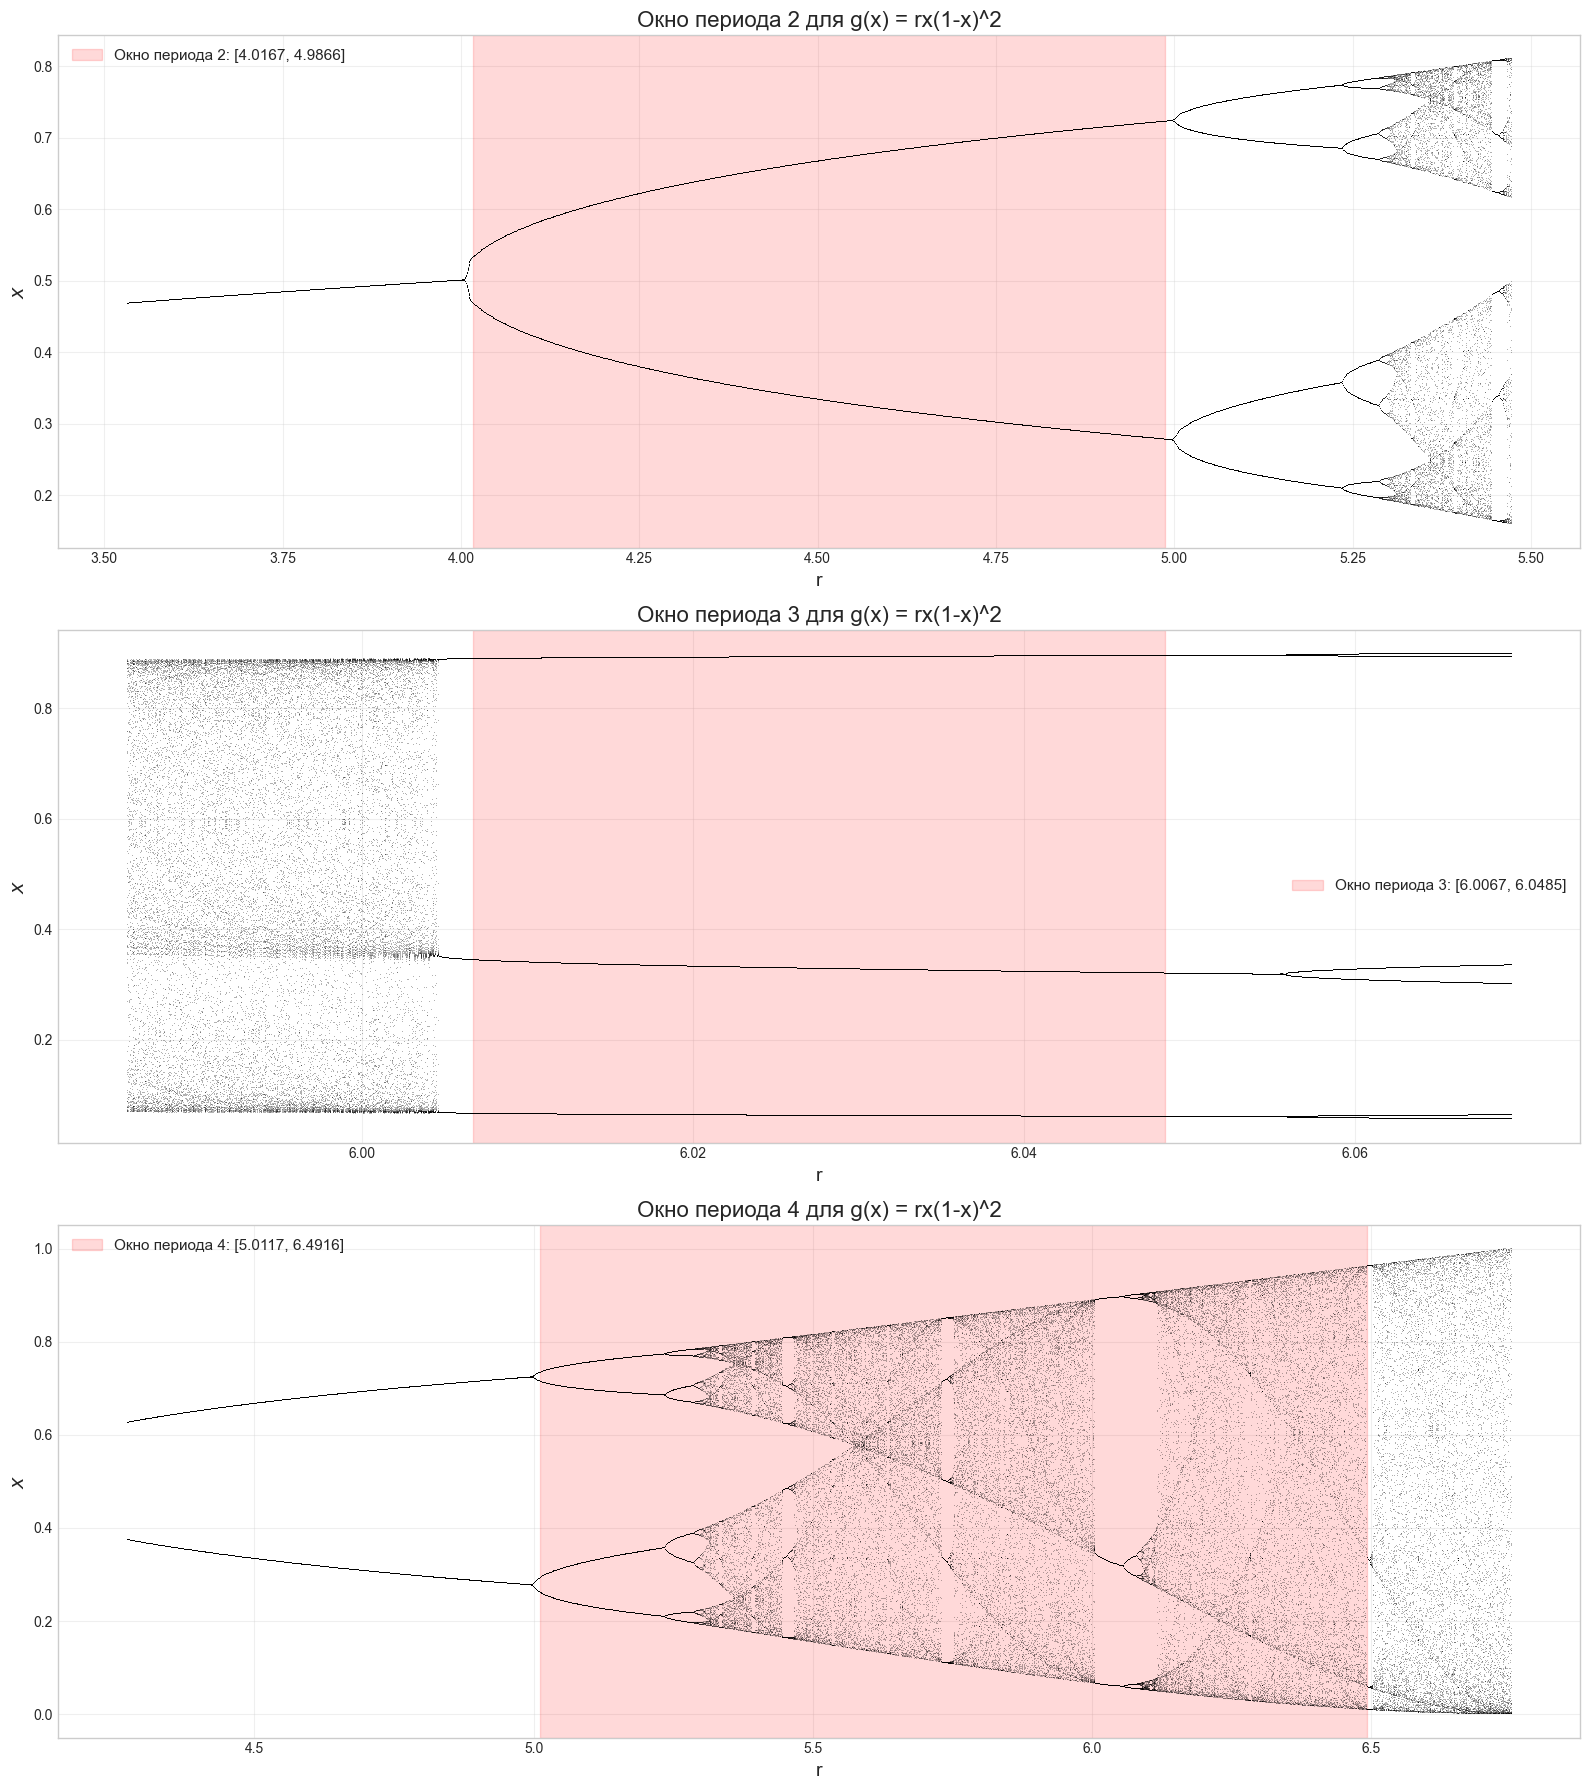

In [28]:
if len(periods_found) > 0:
    interesting_periods = sorted(periods_found.keys())[:3]
    
    fig, axes = plt.subplots(len(interesting_periods), 1, 
                            figsize=(16, 6*len(interesting_periods)))
    if len(interesting_periods) == 1:
        axes = [axes]
    
    for i, period in enumerate(interesting_periods):
        r_vals = np.array(periods_found[period])
        r_min, r_max = r_vals.min(), r_vals.max()
        r_center = r_vals.mean()

        margin = (r_max - r_min) * 0.5
        plot_r_min = max(1.0, r_min - margin)
        plot_r_max = min(6.75, r_max + margin)

        bifurcation_diagram(plot_r_min, plot_r_max, num_r=1500, 
                           num_iterations=800, last_n=80,
                           map_func=variant_map,
                           ax=axes[i], 
                           title=f"Окно периода {period} для g(x) = rx(1-x)^2")

        axes[i].axvspan(r_min, r_max, alpha=0.15, color='red',
                       label=f'Окно периода {period}: [{r_min:.4f}, {r_max:.4f}]')
        axes[i].legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()
else:
    print("\nОкна периодичности не были найдены в исследованном диапазоне.")
    
    fig, ax = plt.subplots(figsize=(16, 10))
    bifurcation_diagram(4.0, 6.5, num_r=2000, num_iterations=1000, last_n=100,
                       map_func=variant_map,
                       ax=ax,
                       title="Бифуркационная диаграмма g(x) = rx(1-x)^2 в хаотической области")
    plt.show()